In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

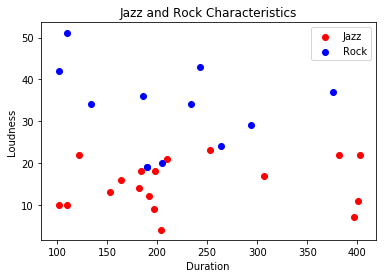

In [2]:
music = pd.DataFrame()

# Some data to play with.
music["duration"] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music["loudness"] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music["jazz"] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1]["duration"],
    music[music['jazz'] == 1]["loudness"],
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0]["duration"],
    music[music['jazz'] == 0]["loudness"],
    color='blue'
)
plt.legend(["Jazz", "Rock"])
plt.title("Jazz and Rock Characteristics")
plt.xlabel("Duration")
plt.ylabel("Loudness")
plt.show()

In [3]:
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[["loudness", "duration"]]
Y = music["jazz"]
neighbors.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [4]:
## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [5]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[["loudness", "duration"]]
neighbors.fit(X, Y)

## Predict for a 24 loudness, 190 seconds long song.
print("Predict: ", neighbors.predict([[24, 190]]))
print("Predict Probability: ", neighbors.predict_proba([[24, 190]]))

Predict:  [1]
Predict Probability:  [[0.4 0.6]]


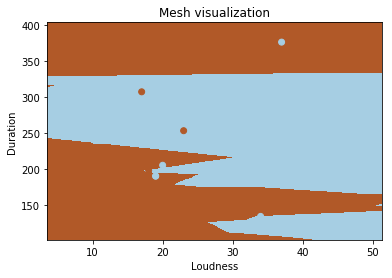

In [6]:
X = np.array(X)
Y = np.array(Y)
h = .15 # mesh size

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

## Drill: Implement the Nearest Neighbor algorithm

In [40]:
# Make a distance function
def calc_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Create point list
def create_point_list(df):
    point_list = []
    for i in range(len(df)):
        point = (df.iloc[i,1], df.iloc[i,0], df.iloc[i,2])
        point_list.append(point)

    return point_list

# Calculate nearest neighbor
def calc_nn(data, target_point):
    point_list = create_point_list(data)
    distance_list = []
    for i in range(len(point_list)):
        dist = calc_distance(target_point, point_list[i])
        result_tup = (dist, point_list[i][2])
        distance_list.append(result_tup)
    distance_list.sort()
    return distance_list[0][1]

In [44]:
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[["loudness", "duration"]]
neighbors.fit(X, Y)

## Predict for a 24 loudness, 190 seconds long song.
print("Predict: ", neighbors.predict([[24, 190]]))

Predict:  [0]


In [50]:
results = calc_nn(music, (24, 190))
print(results)

0


In [51]:
print("Predict: ", neighbors.predict([[10, 400]]))

Predict:  [1]


In [52]:
results = calc_nn(music, (10, 400))
print(results)

1
